<a href="https://colab.research.google.com/github/cij1012/pytrorch/blob/master/%EB%A1%9C%EC%A7%80%EC%8A%A4%ED%8B%B1%20%ED%9A%8C%EA%B7%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt

시그모이드 함수

In [0]:
def sigmoid(x):
  return 1/(1+np.exp(-x))

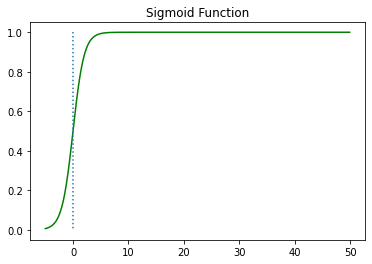

In [4]:
x = np.arange(-5.0,50.,0.1)
y = sigmoid(x)

plt.plot(x, y, 'g')
plt.plot([0,0],[1.0,0.0], ':') # 가운데 점선 추가
plt.title('Sigmoid Function')
plt.show()

W값에 따른 그래프 변화

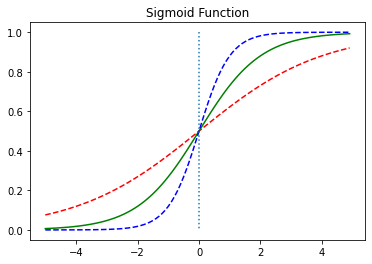

In [5]:
x = np.arange(-5.0, 5.0, 0.1)
y1 = sigmoid(0.5*x)
y2 = sigmoid(x)
y3 = sigmoid(2*x)

plt.plot(x, y1, 'r', linestyle='--') # W의 값이 0.5일때
plt.plot(x, y2, 'g') # W의 값이 1일때
plt.plot(x, y3, 'b', linestyle='--') # W의 값이 2일때
plt.plot([0,0],[1.0,0.0], ':') # 가운데 점선 추가
plt.title('Sigmoid Function')
plt.show()

b값에 따른 그래프 변화

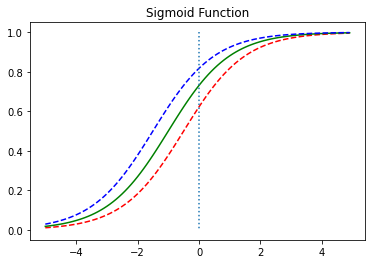

In [6]:
x = np.arange(-5.0, 5.0, 0.1)
y1 = sigmoid(x+0.5)
y2 = sigmoid(x+1)
y3 = sigmoid(x+1.5)

plt.plot(x, y1, 'r', linestyle='--') # x + 0.5
plt.plot(x, y2, 'g') # x + 1
plt.plot(x, y3, 'b', linestyle='--') # x + 1.5
plt.plot([0,0],[1.0,0.0], ':') # 가운데 점선 추가
plt.title('Sigmoid Function')
plt.show()

파이토치로 로지스틱 회귀 구현

In [22]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
torch.manual_seed(1)

In [0]:
x_data = [[1, 2], [2, 3], [3, 1], [4, 3], [5, 3], [6, 2]]
y_data = [[0], [0], [0], [1], [1], [1]]
x_train = torch.FloatTensor(x_data)
y_train = torch.FloatTensor(y_data)

In [9]:
print(x_train.shape,y_train.shape)

torch.Size([6, 2]) torch.Size([6, 1])


In [0]:
W = torch.zeros((2,1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

In [0]:
hypothesis = 1/(1+torch.exp(-(x_train.matmul(W)+b)))

In [12]:
print(hypothesis)

tensor([[0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000]], grad_fn=<MulBackward0>)


In [14]:
hypothesis = torch.sigmoid(x_train.matmul(W)+b)
hypothesis

tensor([[0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000]], grad_fn=<SigmoidBackward>)

In [15]:
print(hypothesis, y_train)

tensor([[0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000]], grad_fn=<SigmoidBackward>) tensor([[0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.]])


In [16]:
-(y_train[0] * torch.log(hypothesis[0]) +
  (1 - y_train[0]) * torch.log(1 - hypothesis[0]))

tensor([0.6931], grad_fn=<NegBackward>)

In [17]:
losses = -(y_train * torch.log(hypothesis) + 
           (1 - y_train) * torch.log(1 - hypothesis))
print(losses)

tensor([[0.6931],
        [0.6931],
        [0.6931],
        [0.6931],
        [0.6931],
        [0.6931]], grad_fn=<NegBackward>)


In [19]:
cost = losses.mean()
cost

tensor(0.6931, grad_fn=<MeanBackward0>)

In [23]:
F.binary_cross_entropy(hypothesis, y_train)

tensor(0.6931, grad_fn=<BinaryCrossEntropyBackward>)

In [0]:
x_data = [[1, 2], [2, 3], [3, 1], [4, 3], [5, 3], [6, 2]]
y_data = [[0], [0], [0], [1], [1], [1]]
x_train = torch.FloatTensor(x_data)
y_train = torch.FloatTensor(y_data)

In [26]:
W = torch.zeros((2,1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

optimizer = optim.SGD([W,b], lr=1)

nb_epochs = 1000
for epoch in range(nb_epochs + 1):
  
  hypothesis = torch.sigmoid(x_train.matmul(W)+b)
  cost = -(y_train * torch.log(hypothesis) +
           (1 - y_train) * torch.log(1 - hypothesis)).mean()

  optimizer.zero_grad()
  cost.backward()
  optimizer.step()

  if epoch % 100 == 0:
    print('Epoch {:4d}/{} Cost: {:.6f}'.format(epoch,nb_epochs, cost.item()))

Epoch    0/1000 Cost: 0.693147
Epoch  100/1000 Cost: 0.134722
Epoch  200/1000 Cost: 0.080643
Epoch  300/1000 Cost: 0.057900
Epoch  400/1000 Cost: 0.045300
Epoch  500/1000 Cost: 0.037261
Epoch  600/1000 Cost: 0.031673
Epoch  700/1000 Cost: 0.027556
Epoch  800/1000 Cost: 0.024394
Epoch  900/1000 Cost: 0.021888
Epoch 1000/1000 Cost: 0.019852


In [27]:
hypothesis = torch.sigmoid(x_train.matmul(W) + b)
hypothesis

tensor([[2.7648e-04],
        [3.1608e-02],
        [3.8977e-02],
        [9.5622e-01],
        [9.9823e-01],
        [9.9969e-01]], grad_fn=<SigmoidBackward>)

In [29]:
prediction = hypothesis >= torch.FloatTensor([0,5])
print(prediction)

tensor([[ True, False],
        [ True, False],
        [ True, False],
        [ True, False],
        [ True, False],
        [ True, False]])


In [30]:
print(W, b)

tensor([[3.2530],
        [1.5179]], requires_grad=True) tensor([-14.4819], requires_grad=True)


nn.module로 구현하기

In [0]:
x_data = [[1, 2], [2, 3], [3, 1], [4, 3], [5, 3], [6, 2]]
y_data = [[0], [0], [0], [1], [1], [1]]
x_train = torch.FloatTensor(x_data)
y_train = torch.FloatTensor(y_data)

In [0]:
model = nn.Sequential(
    nn.Linear(2 , 1),
    nn.Sigmoid()
)

In [34]:
model(x_train)

tensor([[0.4020],
        [0.4147],
        [0.6556],
        [0.5948],
        [0.6788],
        [0.8061]], grad_fn=<SigmoidBackward>)

In [35]:
optimizer = optim.SGD(model.parameters(), lr=1)

nb_epochs = 1000
for epoch in range(nb_epochs + 1):

    # H(x) 계산
    hypothesis = model(x_train)

    # cost 계산
    cost = F.binary_cross_entropy(hypothesis, y_train)

    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    # 20번마다 로그 출력
    if epoch % 10 == 0:
        prediction = hypothesis >= torch.FloatTensor([0.5]) # 예측값이 0.5를 넘으면 True로 간주
        correct_prediction = prediction.float() == y_train # 실제값과 일치하는 경우만 True로 간주
        accuracy = correct_prediction.sum().item() / len(correct_prediction) # 정확도를 계산
        print('Epoch {:4d}/{} Cost: {:.6f} Accuracy {:2.2f}%'.format( # 각 에포크마다 정확도를 출력
            epoch, nb_epochs, cost.item(), accuracy * 100,
        ))

Epoch    0/1000 Cost: 0.539713 Accuracy 83.33%
Epoch   10/1000 Cost: 0.614853 Accuracy 66.67%
Epoch   20/1000 Cost: 0.441875 Accuracy 66.67%
Epoch   30/1000 Cost: 0.373145 Accuracy 83.33%
Epoch   40/1000 Cost: 0.316358 Accuracy 83.33%
Epoch   50/1000 Cost: 0.266094 Accuracy 83.33%
Epoch   60/1000 Cost: 0.220498 Accuracy 100.00%
Epoch   70/1000 Cost: 0.182095 Accuracy 100.00%
Epoch   80/1000 Cost: 0.157299 Accuracy 100.00%
Epoch   90/1000 Cost: 0.144091 Accuracy 100.00%
Epoch  100/1000 Cost: 0.134272 Accuracy 100.00%
Epoch  110/1000 Cost: 0.125769 Accuracy 100.00%
Epoch  120/1000 Cost: 0.118297 Accuracy 100.00%
Epoch  130/1000 Cost: 0.111680 Accuracy 100.00%
Epoch  140/1000 Cost: 0.105779 Accuracy 100.00%
Epoch  150/1000 Cost: 0.100483 Accuracy 100.00%
Epoch  160/1000 Cost: 0.095704 Accuracy 100.00%
Epoch  170/1000 Cost: 0.091369 Accuracy 100.00%
Epoch  180/1000 Cost: 0.087420 Accuracy 100.00%
Epoch  190/1000 Cost: 0.083806 Accuracy 100.00%
Epoch  200/1000 Cost: 0.080486 Accuracy 100.00

In [36]:
model(x_train)

tensor([[2.7616e-04],
        [3.1595e-02],
        [3.8959e-02],
        [9.5624e-01],
        [9.9823e-01],
        [9.9969e-01]], grad_fn=<SigmoidBackward>)

In [37]:
print(list(model.parameters()))

[Parameter containing:
tensor([[3.2534, 1.5181]], requires_grad=True), Parameter containing:
tensor([-14.4839], requires_grad=True)]


클래스로 파이토치 모델 구현하기

In [0]:
model = nn.Sequential(
    nn.Linear(2, 1),
    nn.Sigmoid()
)

In [0]:
class BinaryClassifier(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear = nn.Linear(2, 1)
    self.sigmoid = nn.Sigmoid()

  def forward(self, x):
    return self.sigmoid(self.linear(x))

In [0]:
x_data = [[1, 2], [2, 3], [3, 1], [4, 3], [5, 3], [6, 2]]
y_data = [[0], [0], [0], [1], [1], [1]]
x_train = torch.FloatTensor(x_data)
y_train = torch.FloatTensor(y_data)

In [0]:
class BinaryClassifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(2, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        return self.sigmoid(self.linear(x))

In [0]:
model = BinaryClassifier()

In [44]:
optimizer = optim.SGD(model.parameters(), lr=1)

nb_epochs = 1000
for epoch in range(nb_epochs + 1):

    # H(x) 계산
    hypothesis = model(x_train)

    # cost 계산
    cost = F.binary_cross_entropy(hypothesis, y_train)

    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    # 20번마다 로그 출력
    if epoch % 10 == 0:
        prediction = hypothesis >= torch.FloatTensor([0.5]) # 예측값이 0.5를 넘으면 True로 간주
        correct_prediction = prediction.float() == y_train # 실제값과 일치하는 경우만 True로 간주
        accuracy = correct_prediction.sum().item() / len(correct_prediction) # 정확도를 계산
        print('Epoch {:4d}/{} Cost: {:.6f} Accuracy {:2.2f}%'.format( # 각 에포크마다 정확도를 출력
            epoch, nb_epochs, cost.item(), accuracy * 100,
        ))

Epoch    0/1000 Cost: 0.778947 Accuracy 33.33%
Epoch   10/1000 Cost: 0.606802 Accuracy 66.67%
Epoch   20/1000 Cost: 0.446548 Accuracy 66.67%
Epoch   30/1000 Cost: 0.376169 Accuracy 83.33%
Epoch   40/1000 Cost: 0.318945 Accuracy 83.33%
Epoch   50/1000 Cost: 0.268428 Accuracy 83.33%
Epoch   60/1000 Cost: 0.222594 Accuracy 100.00%
Epoch   70/1000 Cost: 0.183695 Accuracy 100.00%
Epoch   80/1000 Cost: 0.158160 Accuracy 100.00%
Epoch   90/1000 Cost: 0.144616 Accuracy 100.00%
Epoch  100/1000 Cost: 0.134716 Accuracy 100.00%
Epoch  110/1000 Cost: 0.126157 Accuracy 100.00%
Epoch  120/1000 Cost: 0.118640 Accuracy 100.00%
Epoch  130/1000 Cost: 0.111984 Accuracy 100.00%
Epoch  140/1000 Cost: 0.106051 Accuracy 100.00%
Epoch  150/1000 Cost: 0.100728 Accuracy 100.00%
Epoch  160/1000 Cost: 0.095925 Accuracy 100.00%
Epoch  170/1000 Cost: 0.091571 Accuracy 100.00%
Epoch  180/1000 Cost: 0.087604 Accuracy 100.00%
Epoch  190/1000 Cost: 0.083974 Accuracy 100.00%
Epoch  200/1000 Cost: 0.080641 Accuracy 100.00